In [11]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Sample')

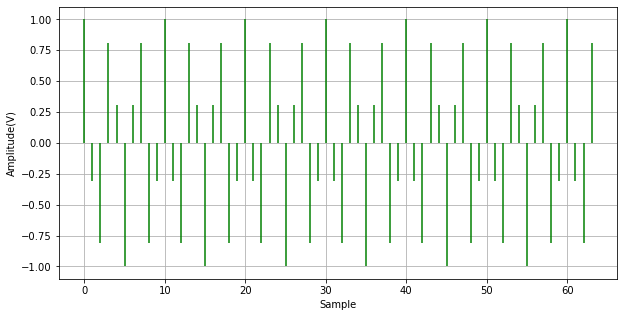

In [12]:
p=np.pi #3.14....
n=np.linspace(0,63,64) #δημιουργία διανύσματος 64 σημείων 
x_n=np.cos(2*p*n*0.3) #προς αναπαράσταση σήμα
fig= plt.figure(figsize=(10,5))#προσαρμογή μεγέθους

plt.vlines(n, 0, x_n, color='g')#αναπαράσταση δειγμάτων
plt.grid() #κελιά στο υπόβαθρο
plt.ylabel('Amplitude(V)') #ετικέτα x άξονα
plt.xlabel('Sample') #ετικέτα y άξονα

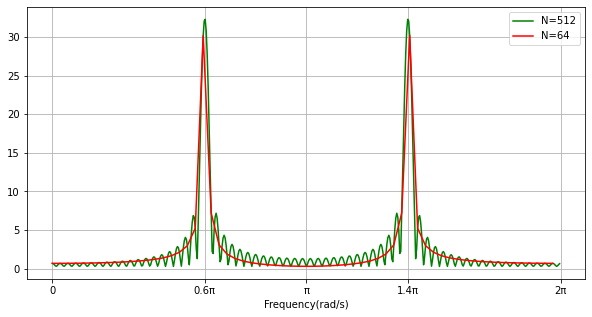

In [13]:
'''Simillar to previous code snippet'''
fig= plt.figure(figsize=(10,5))

dw1=2*p/64
dw2=2*p/512

w1=np.linspace(0,63*dw1,64)
w2=np.linspace(0,511*dw2,512)


plt.xticks([0,0.6*p,p,1.4*p,2*p],['0','0.6π','π','1.4π','2π'])
plt.plot(w2,np.abs(np.fft.fft(x_n,512)),color='g',label='N=512')
plt.plot(w1,np.abs(np.fft.fft(x_n,64)),color='r', label='N=64')

plt.grid()
plt.xlabel('Frequency(rad/s)')
plt.legend()

In [14]:
def hamming(n,L):
    return 0.53836-0.46164*np.cos(2*p*(n)/(L-1))

Text(0.5, 0, 'Sample')

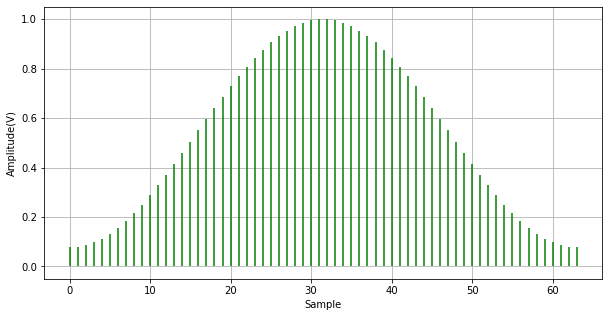

In [15]:
fig= plt.figure(figsize=(10,5))#προσαρμογή μεγέθους

n=np.linspace(0,63,64)
W_n=np.fromiter(map(lambda x:hamming(x,64),n),float)
plt.vlines(n,0,W_n,color='g')

plt.grid()
plt.ylabel('Amplitude(V)')
plt.xlabel('Sample')

Text(0.5, 0, 'Frequency(rad/s)')

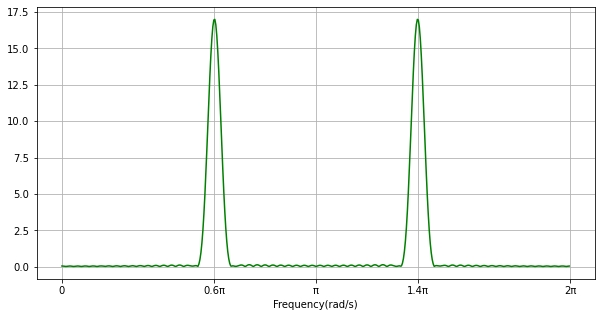

In [16]:
fig= plt.figure(figsize=(10,5))#προσαρμογή μεγέθους

dw2=2*p/512
w2=np.linspace(0,511*dw2,512)
plt.plot(w2,np.abs(np.fft.fft(W_n*x_n,512)),color='g')

plt.xticks([0,0.6*p,p,1.4*p,2*p],['0','0.6π','π','1.4π','2π'])
plt.grid()
plt.xlabel('Frequency(rad/s)')

In [17]:
from scipy.io import wavfile
samplerate, data = wavfile.read(r'C:\Users\krist\Downloads\ece\7o\ΨΕΣ\λαμπ\lab2\mia6.wav')#load file, adjust path accordingly

In [11]:
import sounddevice as sd

fs = 8000  # Sample rate
seconds = 2  # Duration of recording

data = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished

data = np.array([i[0] for i in data])

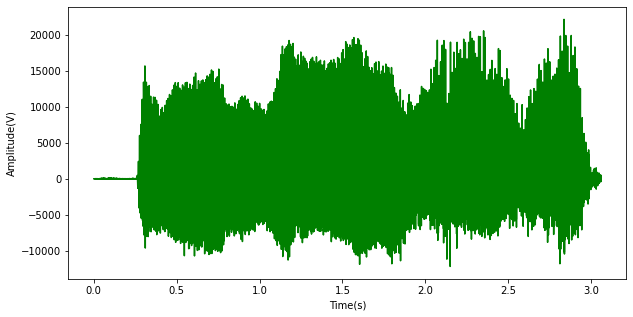

In [18]:
t=np.linspace(0,len(data)/samplerate,len(data))#αντιστοιχηση δειγματων στο χρονο
fig= plt.figure(figsize=(10,5))
plt.xlabel('Time(s)')
plt.ylabel('Amplitude(V)')
plt.plot(t,data,color='g')

Text(0.5, 0, 'Frequency(rad/s)')

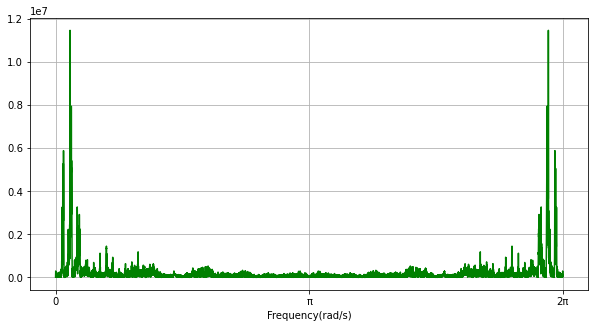

In [19]:
fig= plt.figure(figsize=(10,5))#προσαρμογή μεγέθους

N=len(data)
dw2=2*p/N
w2=np.linspace(0,(N-1)*dw2,N)
W_n=np.fromiter(map(lambda x:hamming(x,N),np.linspace(0,N-1,N)),float)
plt.plot(w2,np.abs(np.fft.fft(W_n*data)),color='g')

plt.xticks([0,p, 2*p],['0','π','2π'])
plt.grid()
plt.xlabel('Frequency(rad/s)')

In [20]:
def create_blocks(data,L,Nfft):
    W_n=np.fromiter(map(lambda x:hamming(x,N),np.linspace(0,L-1,L)),float)

    blocks=[data[(i*L)//4:L+(i*L)//4] for i in range(1+(len(data)-L)//(L//4)) ]
    blocks_fft=[np.abs(np.fft.fft(i*W_n,Nfft)) for i in blocks]
    M=max([max(i) for i in blocks_fft])
    blocks_fft=[i/M for i in blocks_fft]
    blocks_fft=np.transpose(blocks_fft)
    return blocks_fft[Nfft//2:]

Text(0.5, 0, 'Time [sec]')

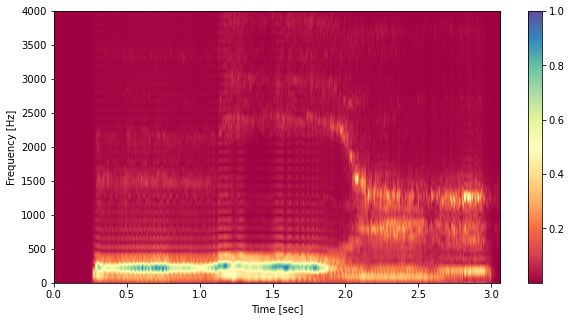

In [21]:
fig= plt.figure(figsize=(10,5))
plt.imshow(create_blocks(data,64,512),cmap='Spectral', extent = [ 0 , len(data)/samplerate, 0 , samplerate//2], aspect='auto' )
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [22]:
def max_freq(data,samplerate,L,Nfft):
    sound=np.transpose(create_blocks(data,L,Nfft))
    plt.plot(np.linspace(0,len(data)/samplerate,len(sound)),[(len(i)-np.argmax(i))*(samplerate//2)//Nfft for i in sound],color='g') 

Text(0.5, 0, 'Time [sec]')

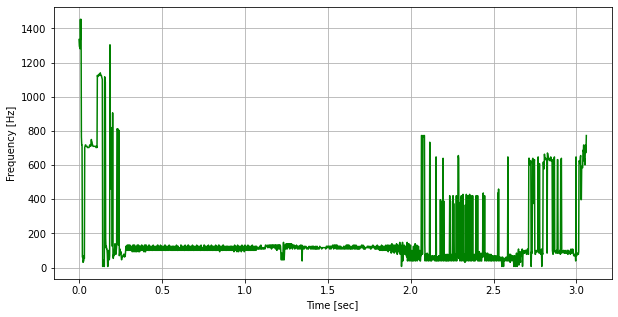

In [23]:
fig= plt.figure(figsize=(10,5))
plt.grid()
max_freq(data,samplerate,64,512)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

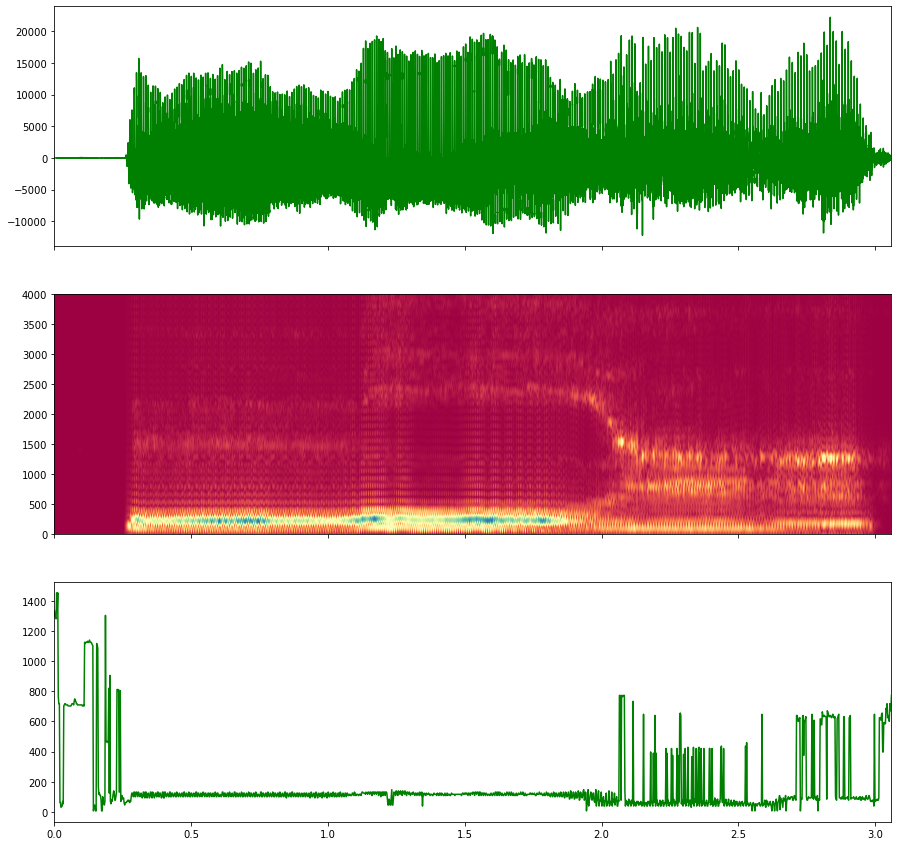

In [24]:
sound=np.transpose(create_blocks(data,64,512))

fig, axs = plt.subplots(3, sharex=True)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0].plot(t,data,color='g')
axs[1].imshow(create_blocks(data,64,512),cmap='Spectral', extent = [ 0 , len(data)/samplerate, 0 , samplerate//2], aspect='auto' )
axs[2].plot(np.linspace(0,len(data)/samplerate,len(sound)),[(len(i)-np.argmax(i))*(samplerate//2)//512 for i in sound],color='g') 